In [1]:
%pylab inline
from astropy import units
import astropy as apy
from profiles import *

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


$\dfrac{d^2 r }{d t^2} = - \dfrac{GMr}{(r^2 + a^2)^{3/2}}$

In [2]:
G = apy.constants.G
G = G.to(units.kpc**3 / units.Msun / units.s**2)
print G
M = 1E12
a = 10.0
Gyr = 1E9 * 365.25 * 24 * 60 * 60
print Gyr

4.51835939627e-39 kpc3 / (s2 solMass)
3.15576e+16


In [89]:
r_ic = 10.0 #kpc
v1 = vc_hernquist(0.6, 10.0, 1E10) 
v2 = vc_mn(6.5, 0.6, 0, 10.0, 5.5E10)
v3 = vc_NFW(11.0, 10.0, 0, 0 , 1E12)

v_ic = v1 + v2 + v3
v_ic = v_ic.to(units.kpc / units.s) / np.sqrt(G*M)
print v_ic
print v_ic.value, r_ic

0.271496922816 solMass(1/2) / kpc(1/2)
0.271496922816 10.0


In [92]:
def acceleration(x, y, z):
    abulge = a_hernquist(0.7, x, y, z)
    adisk = a_mn(6.5, 0.6, x, y, z)
    ahalo = a_NFW(11.0, x, y, z, 1E12)
    ax = abulge[0].value + adisk[0].value + ahalo[0].value
    ay = abulge[1].value + adisk[1].value + ahalo[1].value
    az = abulge[2].value + adisk[2].value + ahalo[2].value
    return ax, ay, az

In [93]:
n_points = 4000
h = 0.1
a = 10.0

t = zeros(n_points)

x = zeros(n_points)
y = zeros(n_points)
z = zeros(n_points)

vx = zeros(n_points)
vy = zeros(n_points)
vz = zeros(n_points)


ax = zeros(n_points)
ay = zeros(n_points)
az = zeros(n_points)


r_ic = 10.0 #kpc

t[0] = 0

x[0] = r_ic # Distance 
y[0] = 0 # Distance 
z[0] = 0 # Distance 

vx[0] = 0.0 # velocity 
vy[0] = v_ic.value # velocity 
vz[0] = 0.0 # velocity 

ax[0] = acceleration(x[0], y[0], z[0])[0]
ay[0] = acceleration(x[0], y[0], z[0])[1]
az[0] = acceleration(x[0], y[0], z[0])[2]

t[1] = t[0] + h
x[1] = x[0] + h * vx[0]
y[1] = y[0] + h * vy[0]
z[1] = z[0] + h * vz[0]

vx[1] = vx[0] + h*a_plummer(a, x[0], y[0], z[0], M)[0]
vy[1] = vy[0] + h*a_plummer(a, x[0], y[0], z[0], M)[1]
vz[1] = vz[0] + h*a_plummer(a, x[0], y[0], z[0], M)[2]

ax[1] = acceleration(x[1],y[1], z[1])[0]
ay[1] = acceleration(x[1],y[1], z[1])[1]
az[1] = acceleration(x[1],y[1], z[1])[2]

for i in range(2,n_points):
    t[i] = t[i-1] + h
    
    x[i] = x[i-2] + 2 * h * vx[i-1]
    y[i] = y[i-2] + 2 * h * vy[i-1]
    z[i] = z[i-2] + 2 * h * vz[i-1]

    vx[i] = vx[i-2] + 2 * h * acceleration(x[i-1], y[i-1], z[i-1])[0]
    vy[i] = vy[i-2] + 2 * h * acceleration(x[i-1], y[i-1], z[i-1])[1]
    vz[i] = vz[i-2] + 2 * h * acceleration(x[i-1], y[i-1], z[i-1])[2]

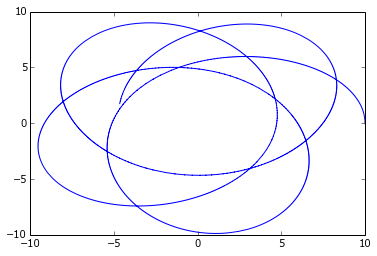

In [94]:
plot(x, y)

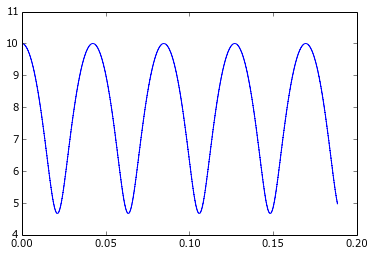

In [95]:
plot(t / np.sqrt(G*M) / Gyr, np.sqrt(x**2+y**2))
#plt.ylim(5, 15)